In [3]:
import pandas as pd

data_excel = pd.read_excel('./Data Kunjungan Mahasiswa ke Perpustakaan Undiksha.xlsx'
                           ,sheet_name='Dasbor')
data_excel.fillna(0,inplace=True)
data_excel["Jumlah Pengunjung"].describe()

count    120.000000
mean       0.558333
std        0.941979
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Jumlah Pengunjung, dtype: float64

Histogram persebaran jumlah pengunjung per menit


<Axes: >

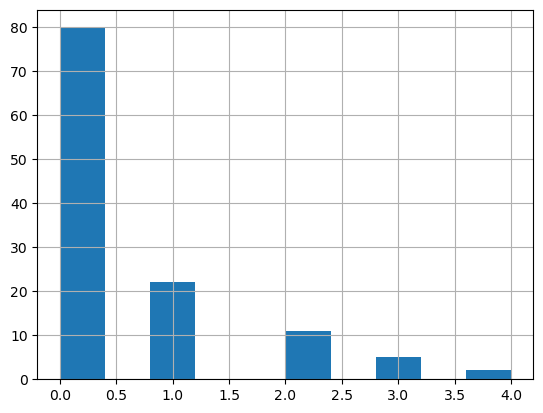

In [4]:
print("Histogram persebaran jumlah pengunjung per menit")
data_excel["Jumlah Pengunjung"].hist()

In [10]:
val_counts = pd.DataFrame(data_excel["Jumlah Pengunjung"].value_counts())
val_counts['probability'] = [c/val_counts["Jumlah Pengunjung"].sum()
                             for c in val_counts["Jumlah Pengunjung"]]
val_counts

,Jumlah Pengunjung,probability
0.0,80,0.666667
1.0,22,0.183333
2.0,11,0.091667
3.0,5,0.041667
4.0,2,0.016667


# Simulasi lempar dadu

In [121]:
import random

N_lempar = 100
N_dadu = 3
df = []
for i in range(N_lempar):
    row = {}
    for j in range(N_dadu):
        row[f'random_{j+1}'] = rand = random.random()
        row[f'dadu_{j+1}'] = dadu = rand*6 //1 + 1
    df.append(row)

lemparan_dadu = pd.DataFrame(df)
lemparan_dadu.describe()

,random_1,dadu_1,random_2,dadu_2,random_3,dadu_3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.426724,3.060000,0.500709,3.480000,0.488941,3.430000
std,0.289871,1.739732,0.312584,1.855813,0.302727,1.736448
min,0.005805,1.000000,0.005390,1.000000,0.003177,1.000000
25%,0.168357,1.750000,0.206928,2.000000,0.214388,2.000000
50%,0.387586,3.000000,0.476782,3.000000,0.503315,4.000000
75%,0.669070,5.000000,0.772383,5.000000,0.710189,5.000000
max,0.994686,6.000000,0.995829,6.000000,0.993816,6.000000


In [122]:
df = []
for i in range(N_lempar):
    row = {}
    for j in range(1,7):
        rand = random.random()
        row[f'pasang_dadu_{j}'] = rand*20 //j + 1
    df.append(row)

pasang_dadu = pd.DataFrame(df)
pasang_dadu.describe()

,pasang_dadu_1,pasang_dadu_2,pasang_dadu_3,pasang_dadu_4,pasang_dadu_5,pasang_dadu_6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.010000,5.910000,3.620000,3.160000,2.550000,2.190000
std,5.774369,2.916671,1.905759,1.502321,1.183856,1.011999
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
50%,11.000000,6.000000,4.000000,3.000000,3.000000,2.000000
75%,16.000000,8.000000,5.000000,5.000000,4.000000,3.000000
max,20.000000,10.000000,7.000000,5.000000,4.000000,4.000000


In [14]:
import pandas as pd
from simulasi_antrean import Simulation

simulator = Simulation(max_minute=1000)
simulator.single_server_simulation()
servered_customers = simulator.server.servered_customers

customers_data = {"name":[],"queue_time":[]}
for customer in servered_customers:
    customers_data["name"].append(customer.name)
    customers_data["queue_time"].append(customer.queuetime)
customers_df = pd.DataFrame(customers_data)


=== minute 0 ===
customer 1 arrive | service time = 2 | enqueued
current customer = customer 21 | time left = 1 | length queue = 1


=== minute 1 ===
server idle... next arrival in minute 6


=== minute 2 ===
customer 1 dequeued
current customer = customer 1 | time left = 2 | length queue = 0


=== minute 3 ===
current customer = customer 1 | time left = 1 | length queue = 0


=== minute 4 ===
server idle... next arrival in minute 6


=== minute 5 ===
server idle... next arrival in minute 6


=== minute 6 ===
customer 3 arrive | service time = 4 | done at minute 10
current customer = customer 3 | time left = 4 | length queue = 0


=== minute 7 ===
current customer = customer 3 | time left = 3 | length queue = 0


=== minute 8 ===
current customer = customer 3 | time left = 2 | length queue = 0


=== minute 9 ===
current customer = customer 3 | time left = 1 | length queue = 0


=== minute 10 ===
server idle... next arrival in minute 13


=== minute 11 ===
server idle... next arrival in

<Axes: >

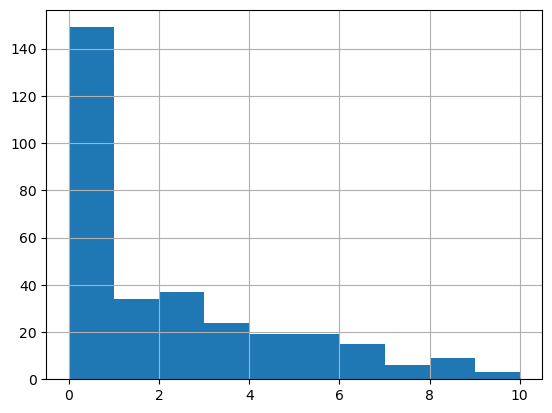

In [15]:
customers_df.queue_time.hist()